In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import fibsem
from fibsem.imaging import masks
from fibsem.imaging import utils

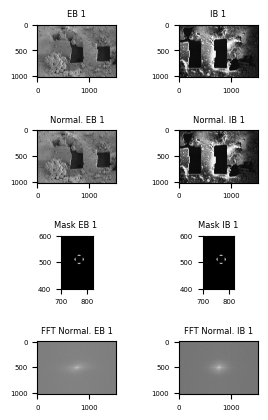

In [9]:
eb1 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_drift_correction_lamella_high_res_eb.tif")
eb1_normal = utils.normalise_image(eb1)

ib1 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_drift_correction_lamella_high_res_ib.tif")
ib1_normal = utils.normalise_image(ib1)

pixelsize_eb1 = eb1.shape
pixelsize_ib1 = ib1.shape

eb1_mask = masks.create_bandpass_mask(pixelsize_eb1, 32, 2, 3)
ib1_mask = masks.create_bandpass_mask(pixelsize_ib1, 32, 2, 3)


plt.subplot(4, 2, 1)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.imshow(eb1, cmap = 'gray')
plt.title("EB 1", fontsize=6)

plt.subplot(4, 2, 2)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.imshow(ib1, cmap = 'gray')
plt.title("IB 1", fontsize=6)

plt.subplot(4, 2, 3)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.imshow(eb1_normal, cmap = 'gray')
plt.title("Normal. EB 1", fontsize=6)

plt.subplot(4, 2, 4)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.imshow(ib1_normal, cmap = 'gray')
plt.title("Normal. IB 1", fontsize=6)

plt.subplot(4, 2, 5)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlim(700,820)
plt.ylim(400,600)
plt.imshow(eb1_mask, cmap = 'gray')
plt.title("Mask EB 1 ", fontsize=6)

plt.subplot(4, 2, 6)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlim(700,820)
plt.ylim(400,600)
plt.imshow(ib1_mask, cmap = 'gray')
plt.title("Mask IB 1", fontsize=6)

plt.subplot(4, 2, 7)
plt.tick_params(axis='both', which='major', labelsize=5)
eb1fft = (np.fft.fftshift(np.fft.fft2(eb1_normal)))
plt.imshow(np.log(np.abs(eb1fft) + 1), cmap = 'gray')
plt.title("FFT Normal. EB 1", fontsize=6)

plt.subplot(4, 2, 8)
plt.tick_params(axis='both', which='major', labelsize=5)
ib1fft = (np.fft.fftshift(np.fft.fft2(ib1_normal)))
plt.imshow(np.log(np.abs(ib1fft) + 1), cmap = 'gray')
plt.title("FFT Normal. IB 1", fontsize=6)

# plt.subplot(4, 2, 9)
# plt.tick_params(axis='both', which='major', labelsize=5)
# eb1_maskfft = (np.fft.fftshift(np.fft.fft2(eb1_mask)))
# plt.imshow(np.log(np.abs(eb1_maskfft) + 1), cmap = 'gray')
# plt.title("FFT Mask EB 1", fontsize=6)

# plt.subplot(4, 2, 10)
# plt.tick_params(axis='both', which='major', labelsize=5)
# ib1_maskfft = (np.fft.fftshift(np.fft.fft2(ib1_mask)))
# plt.imshow(np.log(np.abs(ib1_maskfft) + 1), cmap = 'gray')
# plt.title("FFT Mask IB 1", fontsize=6)

plt.subplots_adjust(hspace=1, wspace=-0.6)
plt.show()


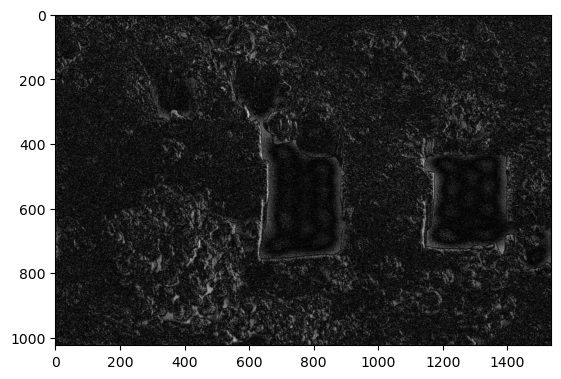

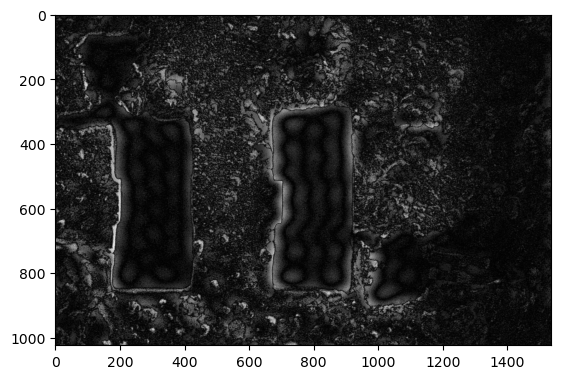

In [8]:
eb1_mask = masks.create_bandpass_mask(pixelsize_eb1, 300, 2, 3)
ib1_mask = masks.create_bandpass_mask(pixelsize_ib1, 300, 2, 3)

eb1fft_filtered = eb1fft * eb1_mask
eb1_filtered = np.fft.ifftshift(np.fft.ifft2(eb1fft_filtered))
plt.imshow(np.abs(np.fft.fftshift(eb1_filtered)), cmap='gray')
plt.show()

ib1fft_filtered = ib1fft * ib1_mask
ib1_filtered = np.fft.ifftshift(np.fft.ifft2(ib1fft_filtered))
plt.imshow(np.abs(np.fft.fftshift(ib1_filtered)), cmap='gray')
plt.show()

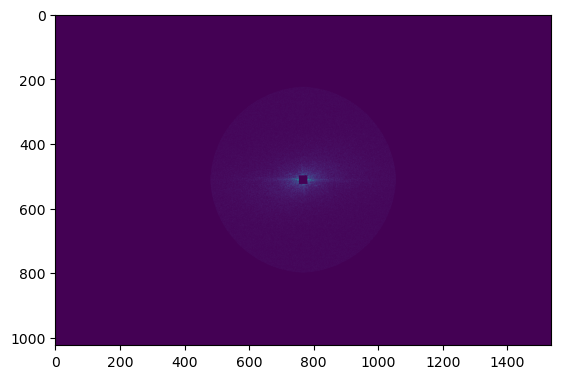

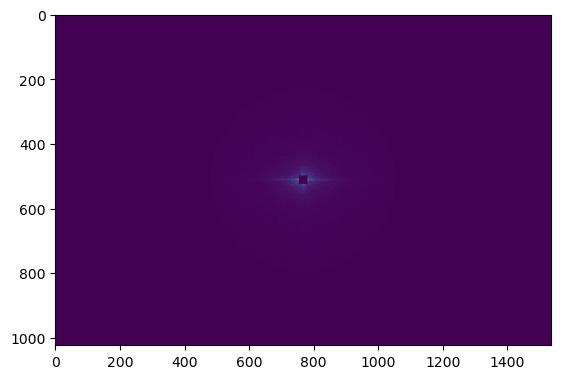

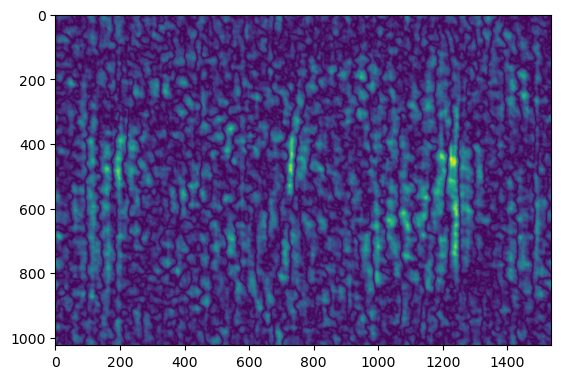

In [295]:
#potential normalization step

# plt.imshow(np.abs(eb1fft_filtered), cmap='gray')
# plt.show()

# plt.imshow(np.abs(ib1fft_filtered), cmap='gray')
# plt.show()

# xcorr = np.real(np.fft.fftshift(np.fft.ifft2(eb1fft_filtered * np.conj(ib1fft_filtered))))
# plt.imshow(np.abs(xcorr))
# plt.show()

n_pixels = eb1.shape[0] * eb1.shape[1]
eb1fft_filtered[0, 0] = 0
tmp = eb1fft_filtered * np. conj(eb1fft_filtered)
eb1fft_filtered = n_pixels * eb1fft_filtered / np.sqrt(tmp.sum())
plt.imshow(np.abs(eb1fft_filtered))
plt.show()

n_pixels = ib1.shape[0] * ib1.shape[1]
ib1fft_filtered[0, 0] = 0
tmp = ib1fft_filtered * np. conj(ib1fft_filtered)
ib1fft_filtered = n_pixels * ib1fft_filtered / np.sqrt(tmp.sum())
plt.imshow(np.abs(ib1fft_filtered))
plt.show()

xcorr = np.fft.fftshift(np.fft.ifft2(eb1fft_filtered * np.conj(ib1fft_filtered)))
plt.imshow(np.abs(xcorr))
plt.show()
